****Python Module End Project****

**As a culminating project, you'll be working with a dataset from ABC company, consisting of 458 rows and 9 columns. The company requires a comprehensive report detailing information about their employees across various teams. Your tasks include preprocessing the dataset, analyzing the data, and presenting your findings graphically. Here's a breakdown of what you need to do:

Exercise 1 

**Preprocessing:**
Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis. (1 mark)**

In [20]:
import pandas as pd
import numpy as np

In [22]:
# Load the dataset
file_path = "myexcel.xlsx"
df = pd.read_excel(file_path)

In [24]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [26]:
# Correct the 'Height' column with random values between 150 and 180
df['Height'] = np.random.randint(150, 181, size=len(df))

In [28]:
# Fill missing values in the 'Salary' column with the mean salary
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

# Display the cleaned dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    int32  
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    458 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 30.5+ KB
None


In [30]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,177,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,161,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,154,205,Boston University,4.833970e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,178,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,158,231,NaN,5.000000e+06
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,150,203,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,24,158,179,NaN,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,26,177,256,NaN,2.900000e+06
456,Jeff Withey,Utah Jazz,24,C,26,164,231,Kansas,9.472760e+05


***Analysis Tasks:***

*1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. (2 marks)*


In [33]:
# Count the number of employees in each team
team_distribution = df['Team'].value_counts()

# Calculate the percentage split
team_percentage = (team_distribution / len(df)) * 100

# Print distribution and percentage split
print("Employee Distribution Across Teams:\n", team_distribution)
print("\nPercentage Split Across Teams:\n", team_percentage)


Employee Distribution Across Teams:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Percentage Split Across Teams:
 Team
New Orleans Pelicans    

2. Segregate employees based on their positions within the company. (2 marks)

In [36]:
# Count the number of employees in each position
position_distribution = df['Position'].value_counts()

# Print the distribution of positions
print("Employee Distribution by Position:\n", position_distribution)

Employee Distribution by Position:
 Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


3. Identify the predominant age group among employees. (2 marks)

In [39]:
# Define age bins and create age groups
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-30', '31-40', '41-50', '51-60']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Calculate the distribution of employees by age group
age_group_distribution = df['Age_Group'].value_counts()

print("Age Group Distribution:\n", age_group_distribution)


Age Group Distribution:
 Age_Group
20-30    346
31-40     91
41-50      0
51-60      0
Name: count, dtype: int64


4. Discover which team and position have the highest salary expenditure. (2 marks)

In [42]:
# Calculate total salary expenditure by team
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)

# Calculate total salary expenditure by position
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

print("Team Salary Expenditure:\n", team_salary)
print("\nPosition Salary Expenditure:\n", position_salary)


Team Salary Expenditure:
 Team
Cleveland Cavaliers       1.118227e+08
Memphis Grizzlies         9.588676e+07
Los Angeles Clippers      9.485464e+07
Oklahoma City Thunder     9.376530e+07
Miami Heat                9.218361e+07
Golden State Warriors     8.886900e+07
Chicago Bulls             8.678338e+07
San Antonio Spurs         8.444273e+07
New Orleans Pelicans      8.275077e+07
Charlotte Hornets         7.834092e+07
Washington Wizards        7.632864e+07
Houston Rockets           7.528302e+07
New York Knicks           7.330390e+07
Atlanta Hawks             7.290295e+07
Los Angeles Lakers        7.177043e+07
Sacramento Kings          7.168367e+07
Dallas Mavericks          7.119873e+07
Toronto Raptors           7.111761e+07
Milwaukee Bucks           6.960352e+07
Detroit Pistons           6.716826e+07
Indiana Pacers            6.675183e+07
Denver Nuggets            6.495590e+07
Minnesota Timberwolves    6.454367e+07
Utah Jazz                 6.400737e+07
Phoenix Suns              6.34451

5. Investigate if there's any correlation between age and salary, and represent it visually. (2 marks)



In [45]:
# Calculate correlation between Age and Salary
correlation = df['Age'].corr(df['Salary'])

print("Correlation between Age and Salary:", correlation)


Correlation between Age and Salary: 0.21116954917686367


**Graphical Representation:**
For each of the five analysis tasks, create appropriate visualizations to present your findings effectively. (5x2 = 10 marks)



**Team Distribution : Bar Chart**

1. Visualization for Employee Distribution Across Teams

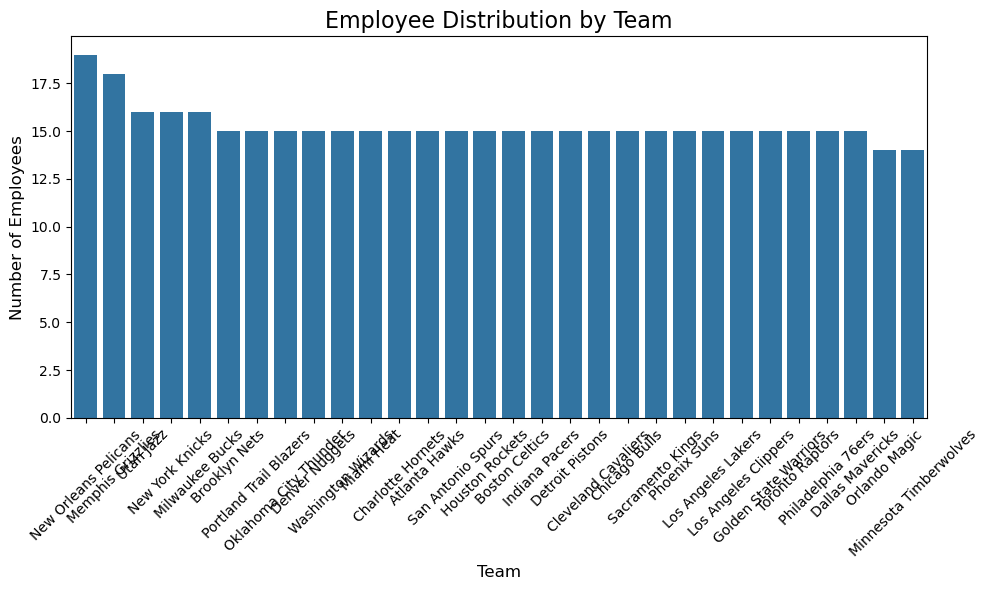

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'team' column exists
team_distribution = df['Team'].value_counts()

# Bar chart for team distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=team_distribution.index, y=team_distribution.values)
plt.title('Employee Distribution by Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Visualization for Employee Distribution Across Positions

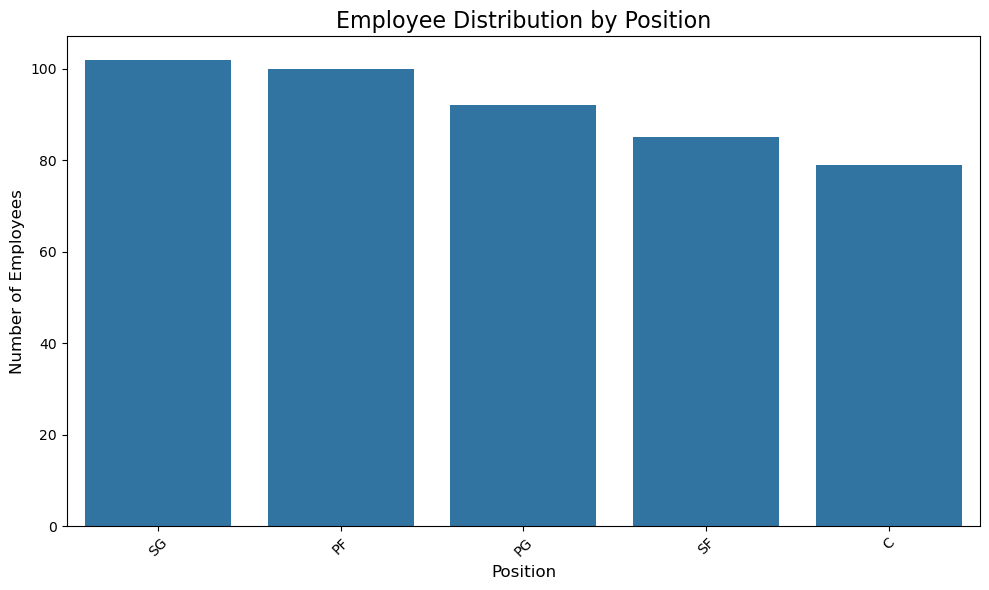

In [92]:
# Bar chart for position distribution
position_distribution = df['Position'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=position_distribution.index, y=position_distribution.values)
plt.title('Employee Distribution by Position', fontsize=16)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3. Pie Chart for Age Group Distribution

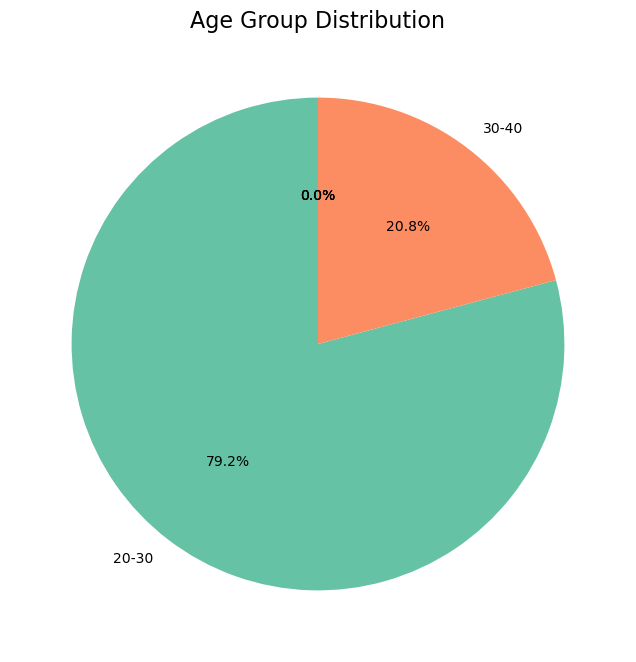

In [95]:
# Segregating employees into age groups (modify age bins as needed)
df['Age_group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

# Pie chart for age group distribution
age_group_distribution = df['Age_group'].value_counts()
plt.figure(figsize=(8, 8))
age_group_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2', len(age_group_distribution)), startangle=90)
plt.title('Age Group Distribution', fontsize=16)
plt.ylabel('')
plt.show()


4. Bar Chart for Salary Expenditure by Team and Position

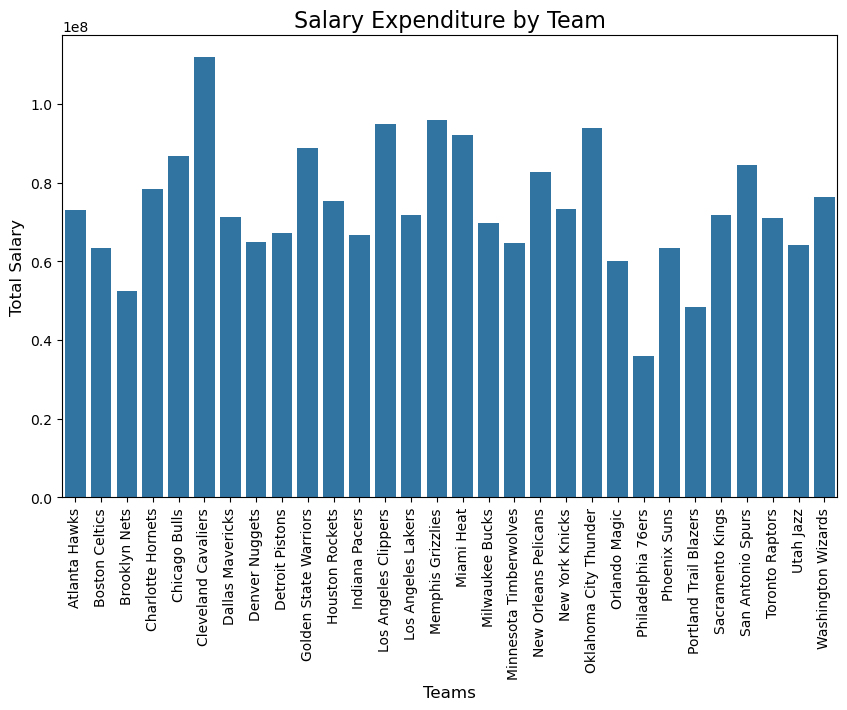

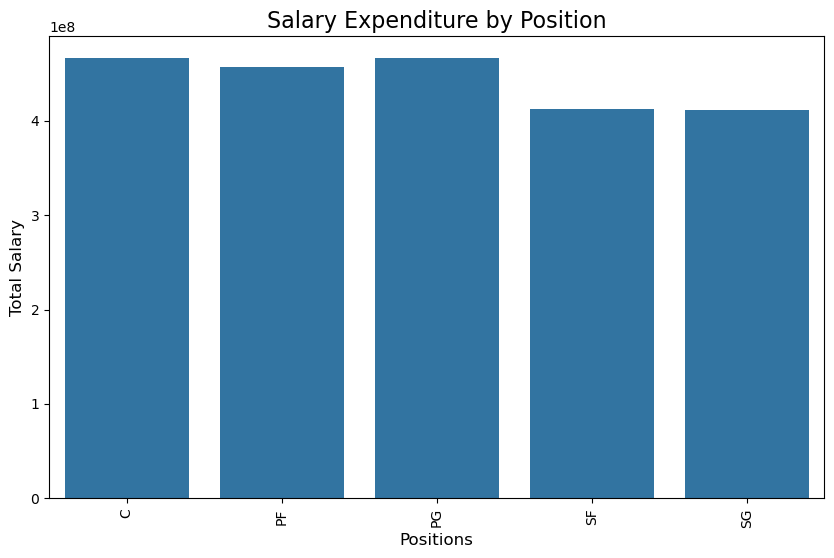

In [98]:
team_salary = df.groupby('Team')['Salary'].sum()
position_salary = df.groupby('Position')['Salary'].sum()

# Team salary expenditure
plt.figure(figsize=(10, 6))
sns.barplot(x=team_salary.index, y=team_salary.values)
plt.title("Salary Expenditure by Team", fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Total Salary", fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Position salary expenditure
plt.figure(figsize=(10, 6))
sns.barplot(x=position_salary.index, y=position_salary.values)
plt.title("Salary Expenditure by Position", fontsize=16)
plt.xlabel("Positions", fontsize=12)
plt.ylabel("Total Salary", fontsize=12)
plt.xticks(rotation=90)
plt.show()


5. Scatter Plot for Age vs. Salary (Correlation)

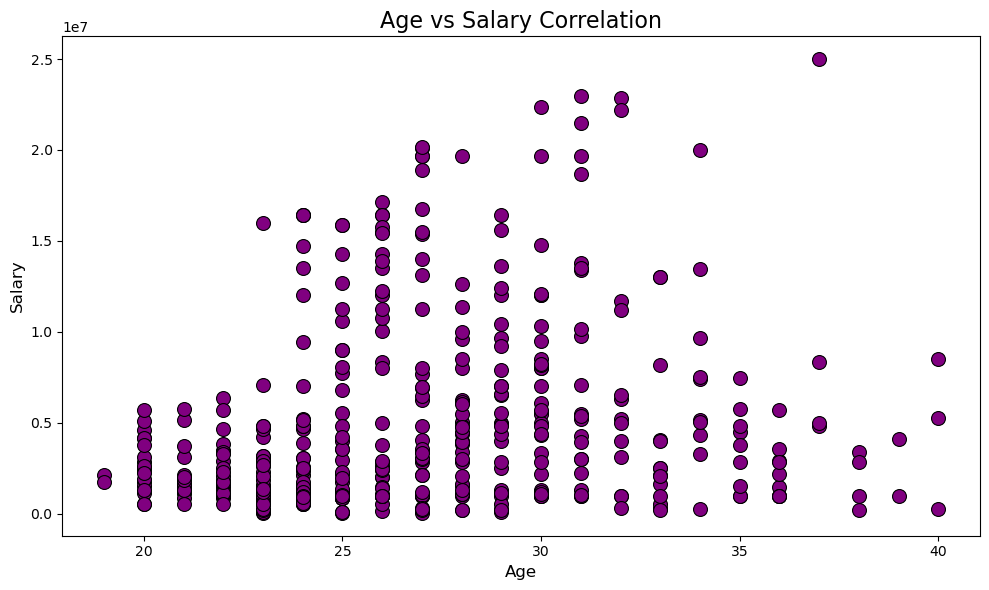

In [101]:
# Scatter plot for Age vs Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=df, color='purple', s=100, edgecolor='black')
plt.title('Age vs Salary Correlation', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.tight_layout()
plt.show()


In [103]:
print(df.dtypes)


Name           object
Team           object
Number          int64
Position       object
Age             int64
Height          int32
Weight          int64
College        object
Salary        float64
Age_Group    category
Age_group    category
dtype: object


**6. Heatmap for Correlation Matrix**

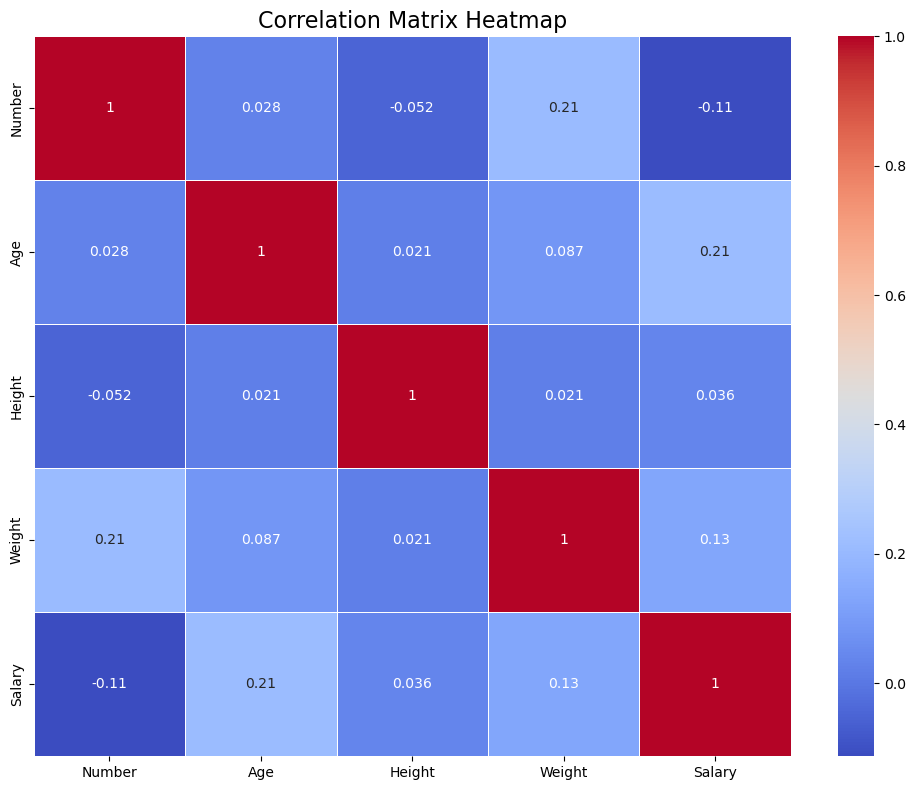

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Drop rows with NaN values 
df_cleaned = df_numeric.dropna()

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


In [106]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age_Group,Age_group
0,Avery Bradley,Boston Celtics,0,PG,25,177,180,Texas,7.730337e+06,20-30,20-30
1,Jae Crowder,Boston Celtics,99,SF,25,161,235,Marquette,6.796117e+06,20-30,20-30
2,John Holland,Boston Celtics,30,SG,27,154,205,Boston University,4.833970e+06,20-30,20-30
3,R.J. Hunter,Boston Celtics,28,SG,22,178,185,Georgia State,1.148640e+06,20-30,20-30
4,Jonas Jerebko,Boston Celtics,8,PF,29,158,231,NaN,5.000000e+06,20-30,20-30
...,...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,150,203,Butler,2.433333e+06,20-30,20-30
454,Raul Neto,Utah Jazz,25,PG,24,158,179,NaN,9.000000e+05,20-30,20-30
455,Tibor Pleiss,Utah Jazz,21,C,26,177,256,NaN,2.900000e+06,20-30,20-30
456,Jeff Withey,Utah Jazz,24,C,26,164,231,Kansas,9.472760e+05,20-30,20-30


In [119]:
#Save as excel
df.to_excel("final_employee_data.xlsx", index=False, sheet_name="Final Data")
